In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import keras


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss, mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense


In [4]:
# missing_values = ['?','--','-','??','.']
df = pd.read_csv("/content/clean_df.csv")
# df_1 = pd.DataFrame(columns=["3", "?", "alfa-romero", "gas", "std", "two", "convertible", "rwd", "front","88.60","168.880","64.10","48.80","2548","dohc","four","130","mpfi","3.47","2.68","9.00","111","5000","21","27","13495"])
# df.columns = ['symboling', 'normalized-losses', 'make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.head(10)

FileNotFoundError: ignored

In [ ]:
df.info()
df.describe()
df.select_dtypes('object').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [ ]:
df.isna().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
horsepower-binned    0
fuel-type-diesel     0
fuel-type-gas        0
aspiration-std       0
aspiration-turbo     0
dtype: int64

In [ ]:
df['normalized-losses'] = df['normalized-losses'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['price'] = df['price'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['stroke'] = df['stroke'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['bore'] = df['bore'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['peak-rpm'] = df['peak-rpm'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['horsepower'] = df['horsepower'].interpolate(method = "linear"
                                      ,limit_direction = "both")
df['num-of-doors'] = df['num-of-doors'].fillna('four')

In [ ]:
df.isna().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
horsepower-binned    0
fuel-type-diesel     0
fuel-type-gas        0
aspiration-std       0
aspiration-turbo     0
dtype: int64

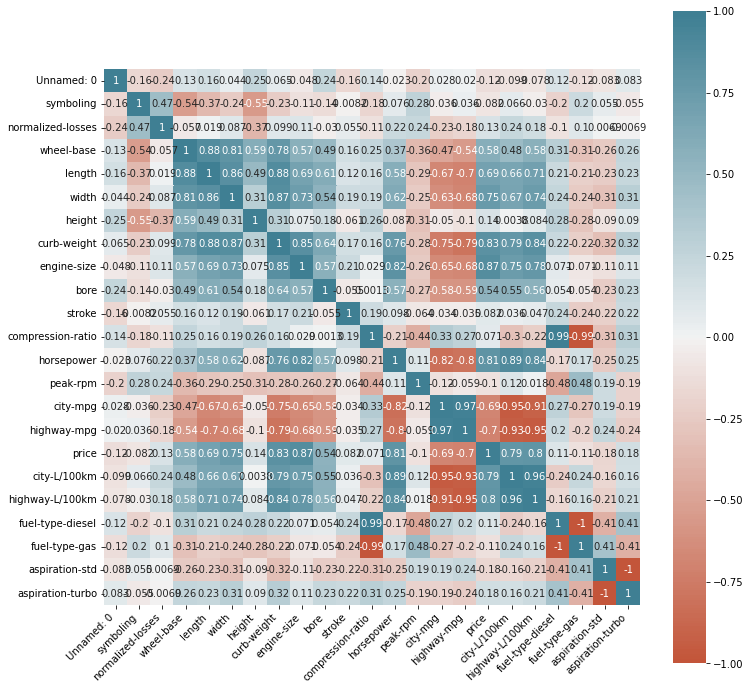

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

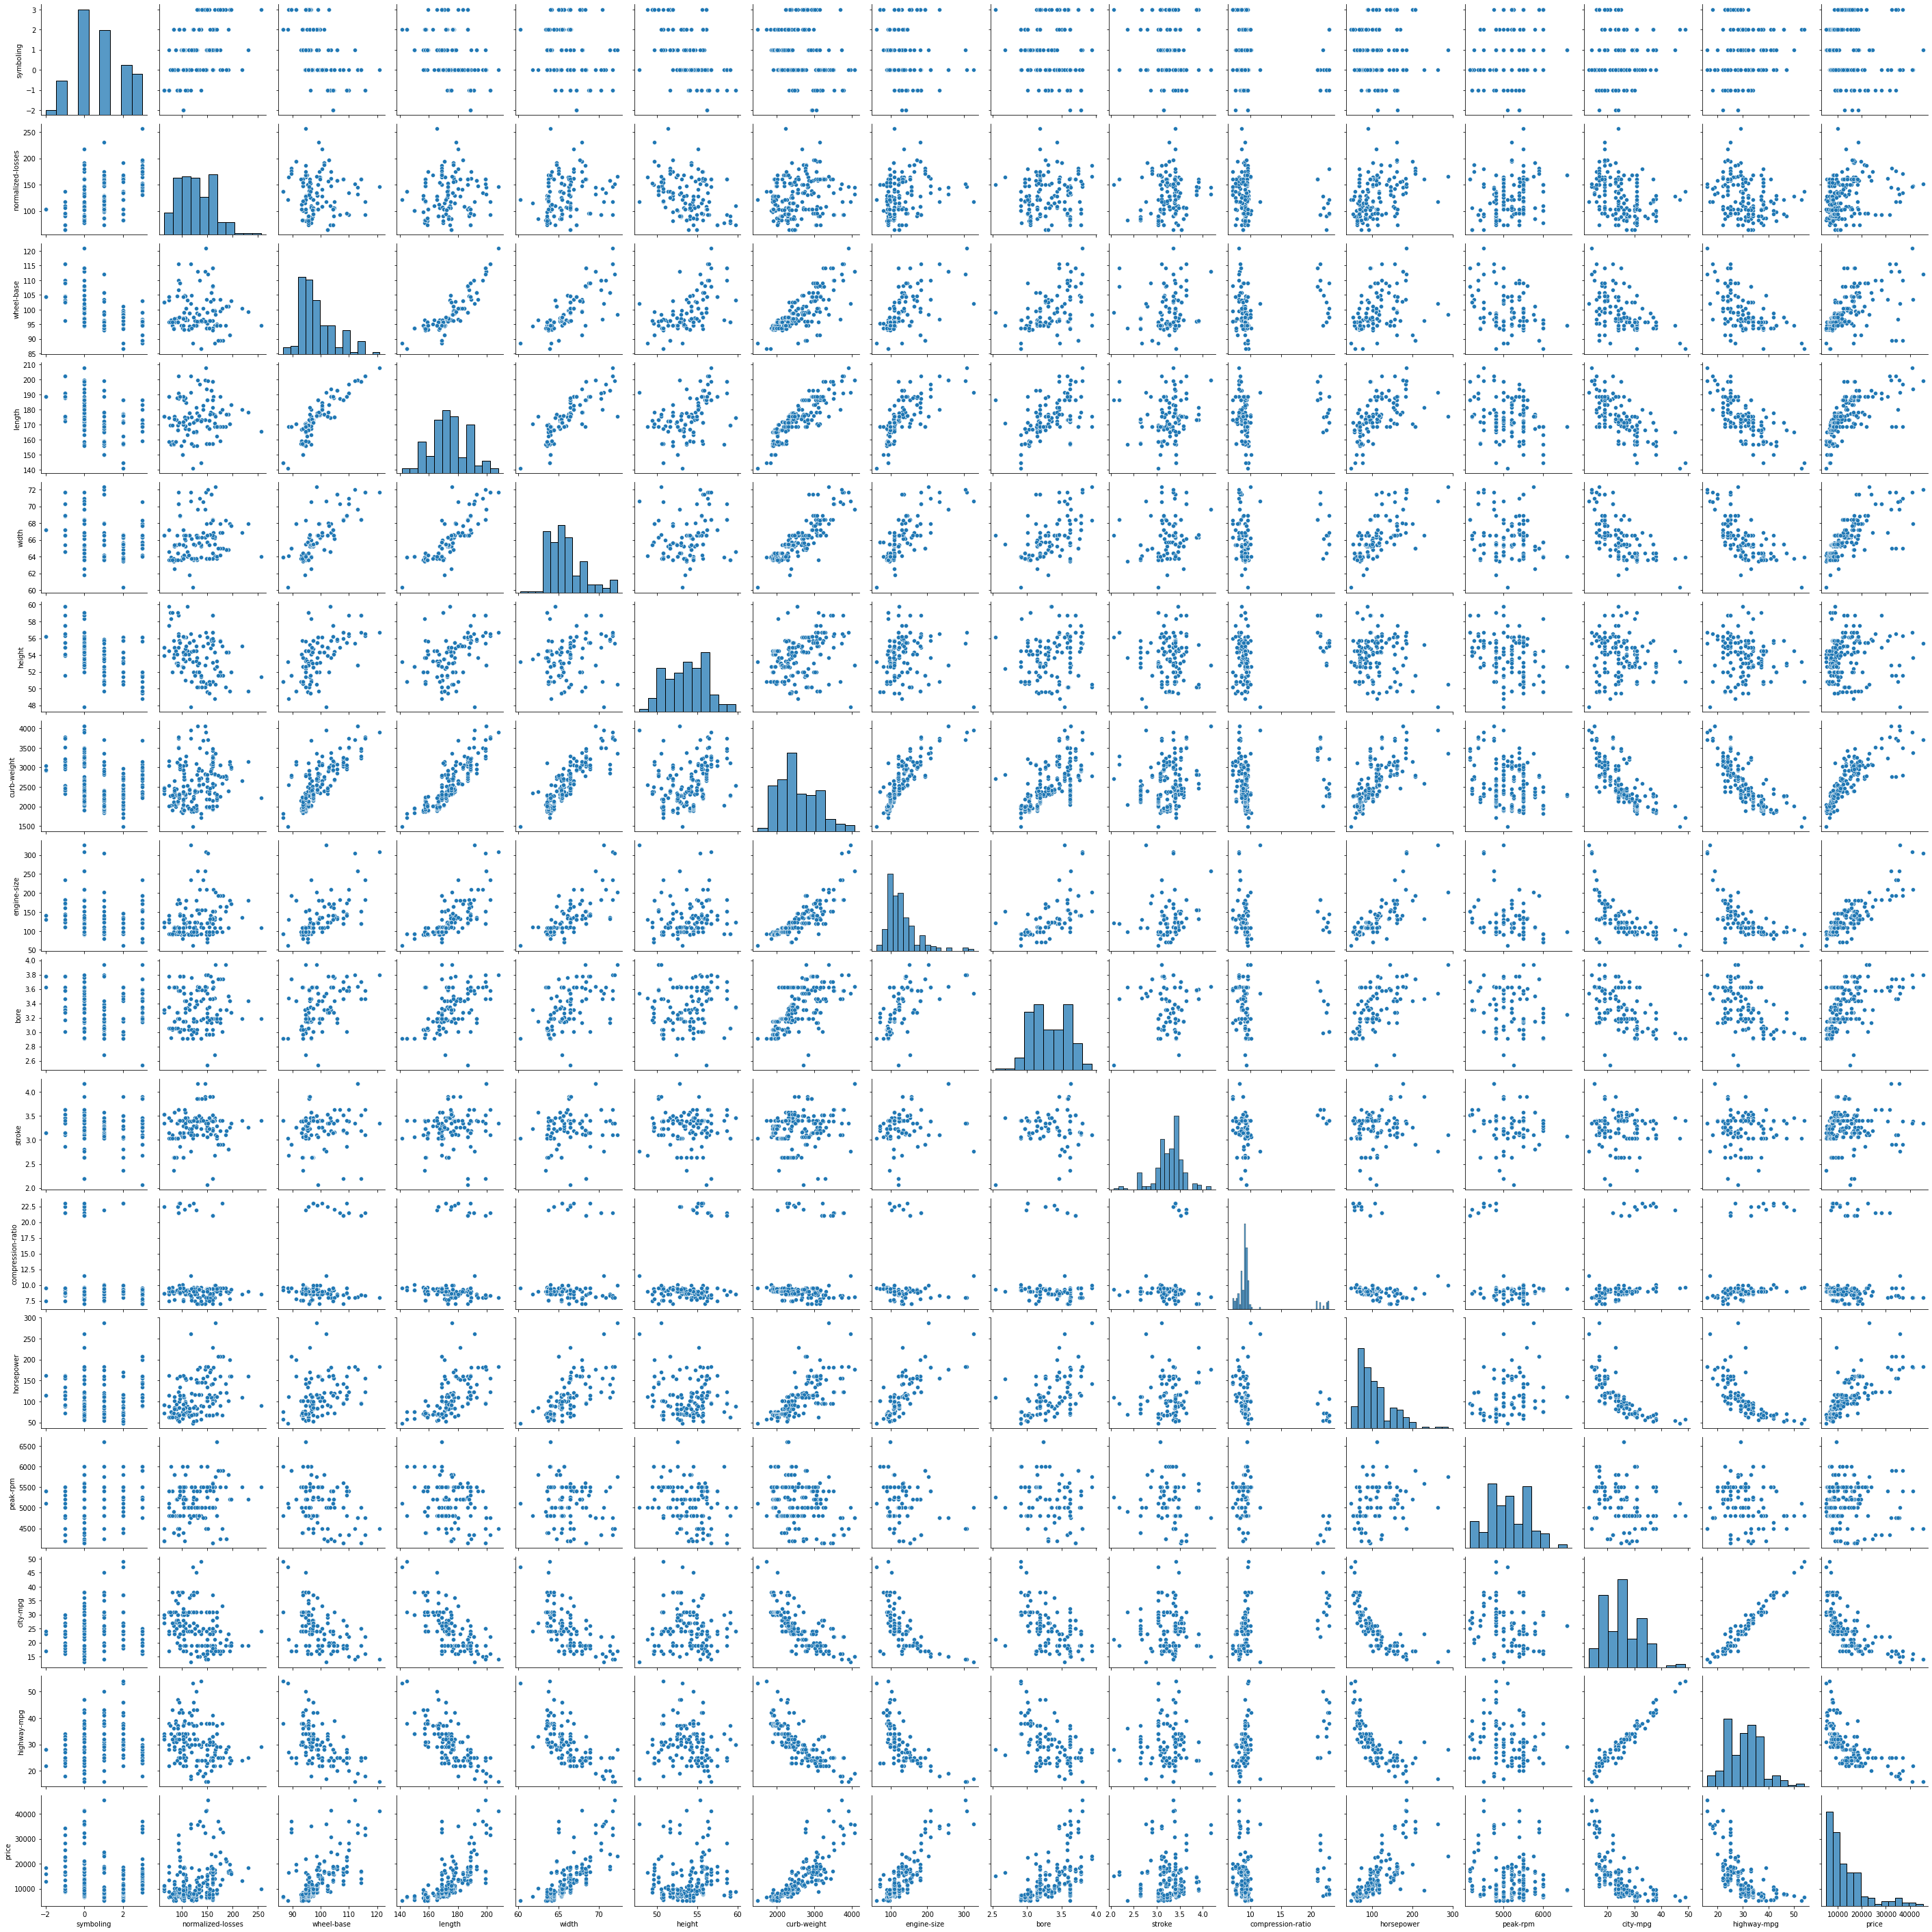

In [ ]:
sns.pairplot(df)
plt.show()


In [ ]:
scaler = RobustScaler()
curb = scaler.fit_transform(pd.DataFrame(df['curb-weight']))
engine = scaler.fit_transform(pd.DataFrame(df['engine-size']))
horsepower = scaler.fit_transform(pd.DataFrame(df['horsepower']))

df['curb-weight'] = curb
df['engine-size'] = engine
df['horsepower'] = horsepower

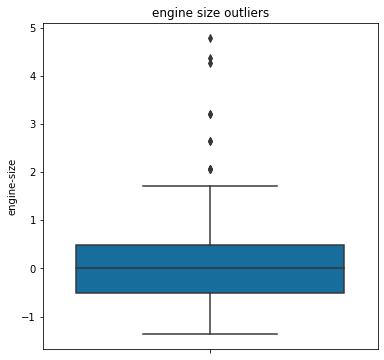

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y='engine-size',data=df, 
                 palette="colorblind")
plt.title('engine size outliers');

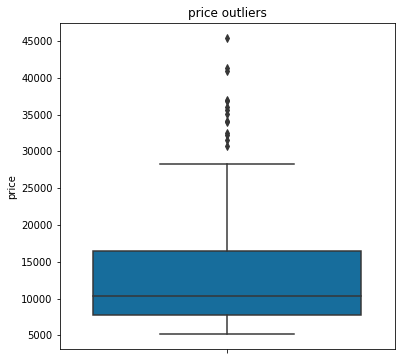

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=df, 
                 palette="colorblind")
plt.title('price outliers');

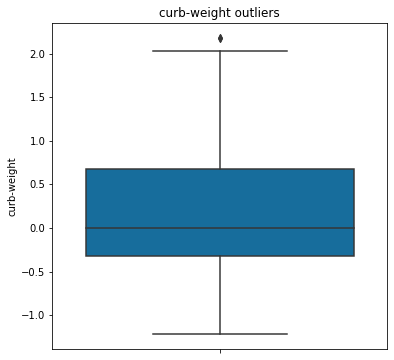

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y='curb-weight',data=df, 
                 palette="colorblind")
plt.title('curb-weight outliers');

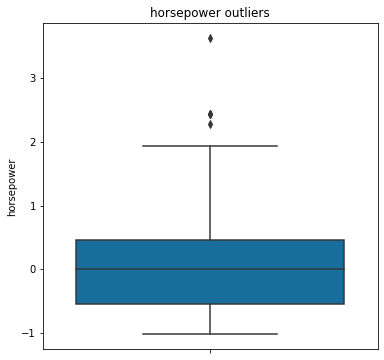

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y='horsepower',data=df, 
                 palette="colorblind")
plt.title('horsepower outliers');

In [ ]:
num_var = ['engine-size','horsepower','curb-weight','price']
for i in num_var:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i] = np.where(df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df[i])
    df[i] = np.where(df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df[i])

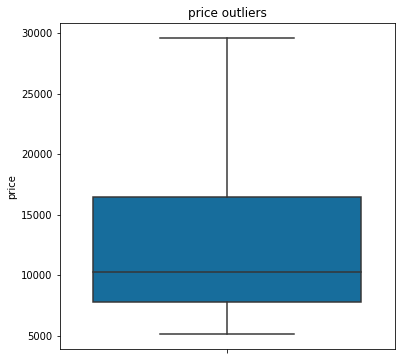

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=df, 
                 palette="colorblind")
plt.title('price outliers');

In [ ]:
df.head()
'symboling', 'normalized-losses', 'make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','num-of-cylinders','engine-type','fuel-system','bore','stroke','compression-ratio','peak-rpm','city-mpg','highway-mpg','price','city-L/100km','highway-L/100km',

('symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'num-of-cylinders',
 'engine-type',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'highway-L/100km')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    float64
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    float64
 16  fuel-system        201 non

In [ ]:
X = df[['engine-size','curb-weight','horsepower']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(160, 3) (160,) (41, 3) (41,)


In [ ]:
X.head()

,engine-size,curb-weight,horsepower
0,0.232558,0.177015,0.347826
1,0.232558,0.177015,0.347826
2,0.744186,0.540291,1.282609
3,-0.255814,-0.101717,0.152174
4,0.372093,0.541612,0.434783


In [ ]:
df.tail(5)

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
196,196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0
197,197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1
198,198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0
199,199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1
200,200,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,19,25,22625.0,12.368421,9.400000,Low,0,1,0,1


In [ ]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [ ]:
klasifikasi = LinearRegression()
klasifikasi.fit(X_train, y_train)
y_pred = klasifikasi.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2

14231996.545961194


0.8199031937867196

In [ ]:
classifiers = [
    LinearRegression(),
    ]
model_performance = pd.DataFrame(columns=['Method', 'mse','mae'])

In [ ]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    method = str(type(classifier)).split('.')[-1][:-2]
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    model_performance = model_performance.append({
        'Method':method,
        'mae':mae,
        'mse':mse}, ignore_index=True)

In [ ]:
model_performance.sort_values([ 'mse','mae'], ascending=False).reset_index(drop=True)

,Method,mse,mae
0,LinearRegression,1.423200e+07,2841.6567


In [ ]:
y_test


15     29587.875
9      16430.000
115    17950.000
78      7689.000
66     25552.000
45     11048.000
132    12170.000
161     9258.000
201    21485.000
181     7775.000
69     29587.875
163     8238.000
167     9639.000
152     6918.000
56     13645.000
191    13845.000
18      6295.000
79      9959.000
55     11845.000
146    10198.000
177    16558.000
97      8249.000
95      7499.000
30      6855.000
127    29587.875
16     29587.875
174     9988.000
86      9279.000
135    18150.000
124    22018.000
65     18344.000
68     28176.000
128    23161.500
67     28248.000
76      6189.000
100    13499.000
140     7126.000
138     7053.000
144    11259.000
84      6989.000
82     14869.000
Name: price, dtype: float64

In [ ]:
classifier.predict(29587)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored